In [2]:
#importing libraries

import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
def wrangler(file_path: Path):

    #reading the data
    df = pd.read_csv(file_path)

    #creating a column "average"
    # df["total_score"] =df["math score"] + df["reading score"] + df["writing score"]
    # df["average"] = df["total_score"]/3

    # # drop leaky columns
    # df.drop(columns=["math score", "reading score", "writing score", "total_score"], inplace=True)

    return df

In [4]:
df=wrangler(r"students_performance/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
# Data preparation
X= df.drop(columns=["math score"])
y= df["math score"]

In [6]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    [
        ('ohe', OneHotEncoder(), X.select_dtypes('object').columns),
        ('stdscaler', StandardScaler(), X.select_dtypes('number').columns)
    ]
)

X = preprocessor.fit_transform(X)

In [7]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 19), (200, 19), (800,), (200,))

In [9]:
models ={
        'linearregression':LinearRegression(),
        'Ridge':Ridge(),
        'Lasso':Lasso(),
        'decisiontree': DecisionTreeRegressor(),
        'randomforestregressor':RandomForestRegressor(),
        'adaboosteregressor':AdaBoostRegressor(),        
        'kneighborregressor':KNeighborsRegressor(),
        'catboostregressor':CatBoostRegressor(),
        'xgbregressor':XGBRegressor()
}

In [10]:
def evaluate_model(true_values, predicted_values):
    mae_score=mean_absolute_error(true_values, predicted_values)
    mse_score = mean_squared_error(true_values, predicted_values)
    rmse_score =np.sqrt(mean_squared_error(true_values, predicted_values))
    return mae_score, mse_score, rmse_score

In [26]:
model_list =[]
mae_train_scores=[]
mae_test_scores =[]
for i in range(len(list(models.values()))):
    model = list(models.values())[i].fit(X_train, y_train)

    train_predicted= model.predict(X_train)
    mae_train_score, mse_train_score, rmse_train_score = evaluate_model(y_train, train_predicted)

    test_predicted= model.predict(X_test)
    mae_test_score, mse_test_score, rmse_test_score = evaluate_model(y_test, test_predicted)

    model_list.append(list(models.keys())[i])
    mae_train_scores.append(mae_train_score)
    mae_test_scores.append(mae_test_score)   

Learning rate set to 0.039525
0:	learn: 14.5987177	total: 2.82ms	remaining: 2.82s
1:	learn: 14.2251886	total: 5.19ms	remaining: 2.59s
2:	learn: 13.8866124	total: 10.5ms	remaining: 3.49s
3:	learn: 13.5235688	total: 12.9ms	remaining: 3.21s
4:	learn: 13.1887021	total: 15.2ms	remaining: 3.02s
5:	learn: 12.9124226	total: 17.8ms	remaining: 2.94s
6:	learn: 12.6000335	total: 20ms	remaining: 2.84s
7:	learn: 12.3299057	total: 24.9ms	remaining: 3.09s
8:	learn: 12.0660619	total: 27.8ms	remaining: 3.06s
9:	learn: 11.7730981	total: 30.1ms	remaining: 2.98s
10:	learn: 11.4922764	total: 32.6ms	remaining: 2.93s
11:	learn: 11.2626483	total: 35.1ms	remaining: 2.89s
12:	learn: 11.0426039	total: 40.9ms	remaining: 3.11s
13:	learn: 10.7991693	total: 43.4ms	remaining: 3.06s
14:	learn: 10.5541002	total: 47ms	remaining: 3.08s
15:	learn: 10.3191811	total: 49.3ms	remaining: 3.03s
16:	learn: 10.1000444	total: 51.8ms	remaining: 3s
17:	learn: 9.8945567	total: 58.4ms	remaining: 3.19s
18:	learn: 9.6901741	total: 60.9ms

<Axes: >

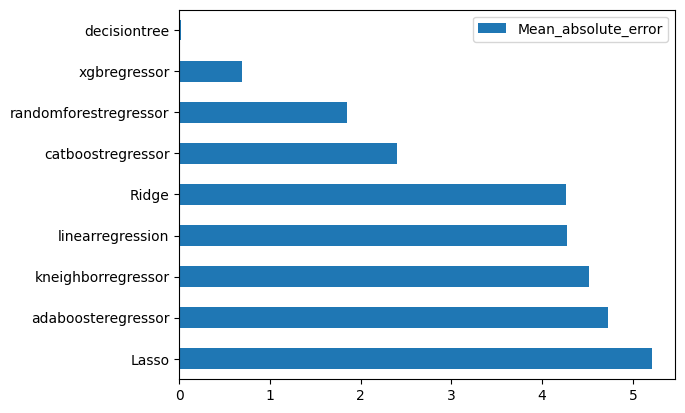

In [27]:
df_scores = pd.DataFrame(mae_train_scores, model_list,  columns=["Mean_absolute_error"]).sort_values(by="Mean_absolute_error", ascending=False)
df_scores.plot(kind="barh")

<Axes: >

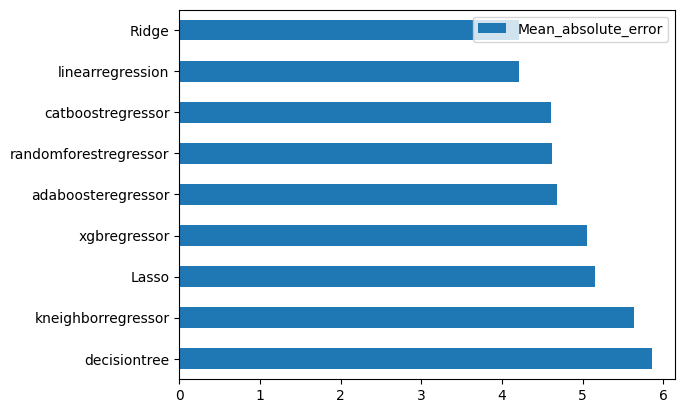

In [24]:
df_scores = pd.DataFrame(mae_test_scores, model_list,  columns=["Mean_absolute_error"]).sort_values(by="Mean_absolute_error", ascending=False)
df_scores.plot(kind="barh")

At the moment LinearRegression and Lasso are performing well on both training and testing data, they are not overfitting. However, this might change once we add hyperparameters.